In [19]:
import numpy as np

In [20]:

from matplotlib import pyplot as plt
import matplotlib.lines as mlines
from functools import partial

plt.rcParams["figure.figsize"] = (20,10)

def grad_batch(f_batch_size, batch_size):
    def grad_help(*args):
        h = 1e-10
        dim = len(args)
        f = f_batch_size(batch_size)
        return [(
                        f(*[args[j] + (h if j == i else 0) for j in range(dim)])
                        -
                        f(*[args[j] - (h if j == i else 0) for j in range(dim)])
                ) / (2 * h)
                for i in range(dim)]
    return grad_help

def sgd_general(batch_size, f, lr0, d, epoch, x):
    points = np.zeros((epoch, len(x)))
    points[0] = x
    for i in range(1, epoch):
        x = x - lr0*np.exp(-d*i) * np.array(grad_batch(f, batch_size)(*x))
        points[i] = x
    return points

def regression(x, y, batch_size=1):
    x_mat = np.hstack((np.ones((x.shape[0], 1)), x))
    k = x_mat.shape[1]
    batch_choice = lambda batch_size: list(set(np.random.choice(np.arange(x.shape[0]), batch_size, replace=False)))
    f_batch_size = lambda batch_size: \
                       lambda *b, batch=batch_choice(batch_size): \
                           np.linalg.norm((y[batch] - x_mat[batch].dot(b)))
    bs = sgd_general(batch_size, f_batch_size, 0.5, 0.005, 1000, np.full(k, 1))
    f = f_batch_size(x.shape[0])
    print(f'came close by {f(*bs[-1])}')
    ax = plt.figure().add_subplot()
    X = np.arange(len(bs))
    ax.plot(X, np.vectorize(f)(*bs.T))
    ax.grid()
    if len(x[0]) == 1:
        draw_2d(x, y, bs[-1])
    return bs[-1]

def draw_2d(x, y, bs):
    x = x.reshape(len(x))
    ax = plt.figure().add_subplot()
    ax.scatter(x, y)
    ax.grid(True)
    tmin = x.min() - 1
    tmax = x.max() + 1
    X = np.array([tmin, tmax])
    Y = (lambda z: bs[0] + bs[1] * z)(X)
    ax.add_line(mlines.Line2D(X, Y))


came close by 0.014811475466299857


array([20.00001309,  9.99531621])

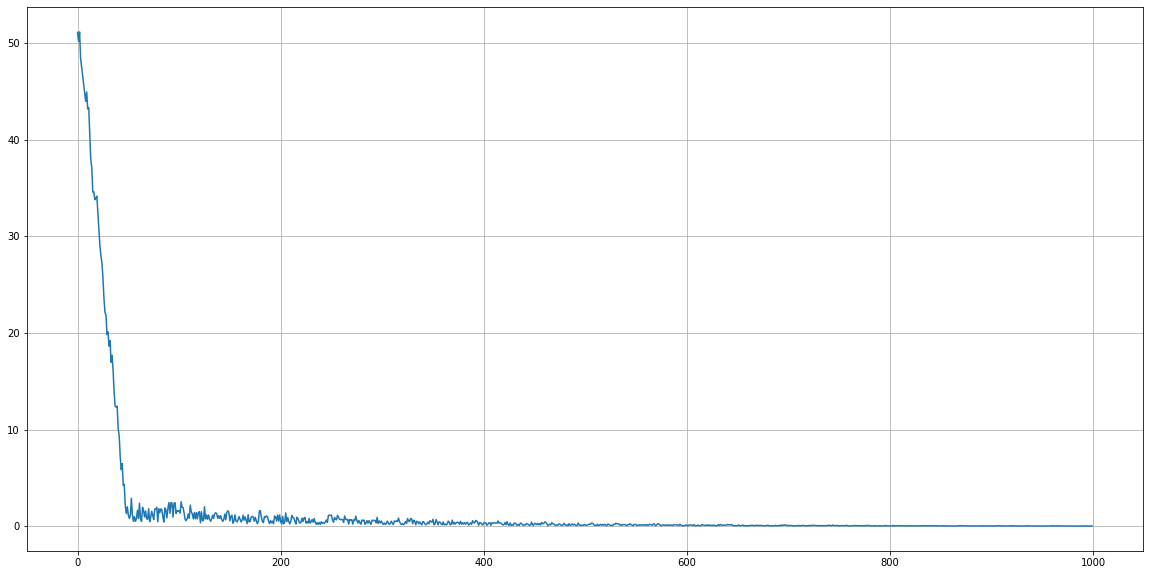

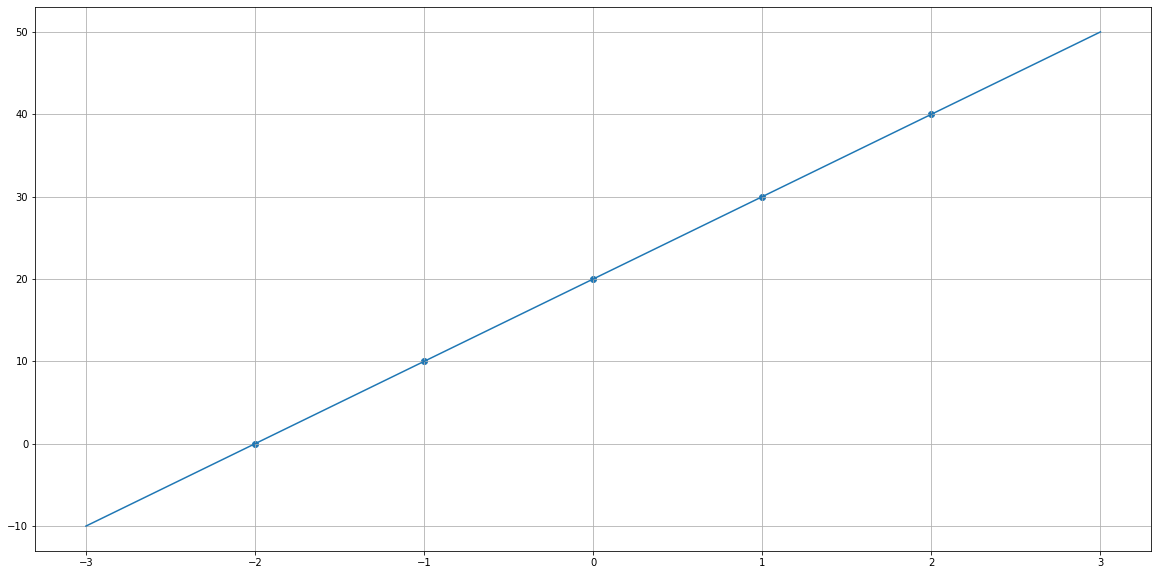

In [21]:
regression(np.array([[-2], [-1], [ 0], [ 1], [2]]), np.array([0, 10, 20,30, 40]))

came close by 4.5089816778895075
came close by 5.403089584942784
came close by 1.5053342640725962
came close by 2.9270091149130124
came close by 1.478756180664893
came close by 8.39609737505433
came close by 147.0124602413769


array([ 0.23184518,  0.25281651, -0.74323263,  0.19235402, -0.10125862,
       -0.0580923 ,  0.23721107,  0.4549172 ,  0.38537572, -0.07402359])

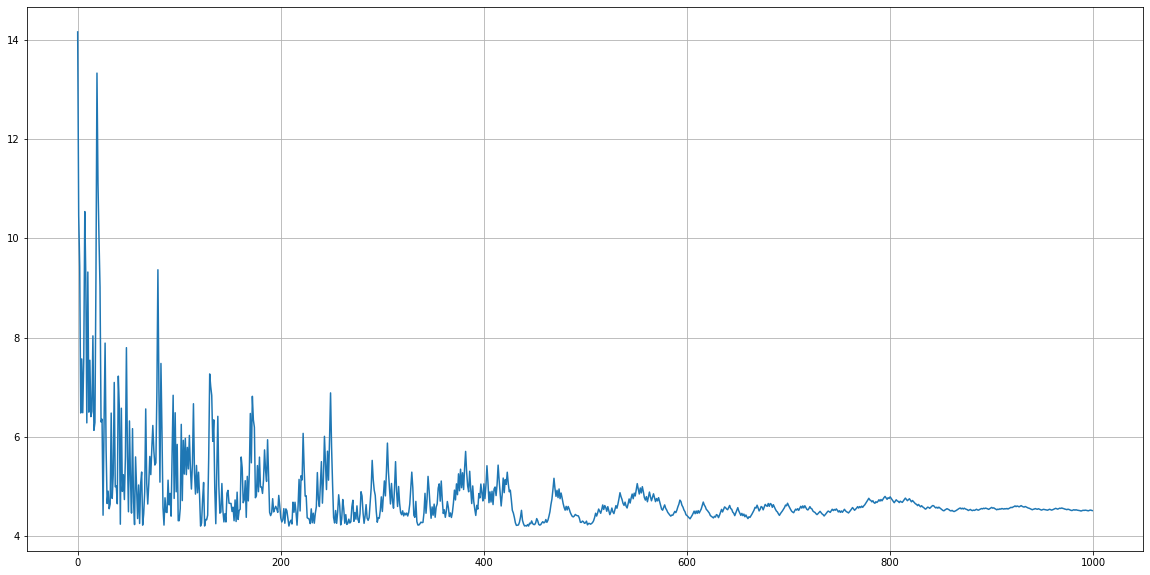

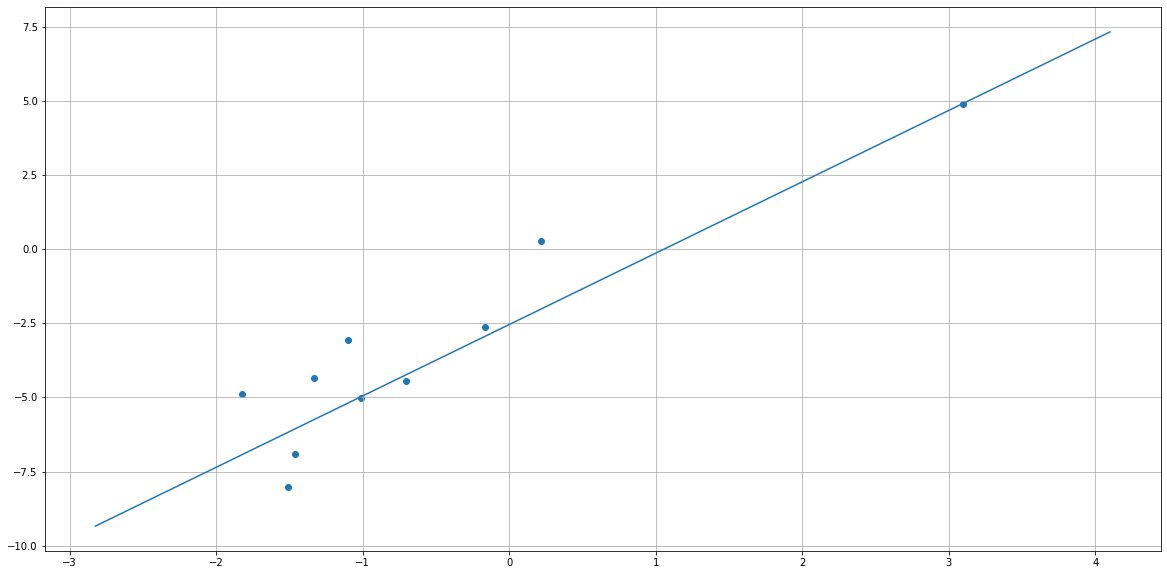

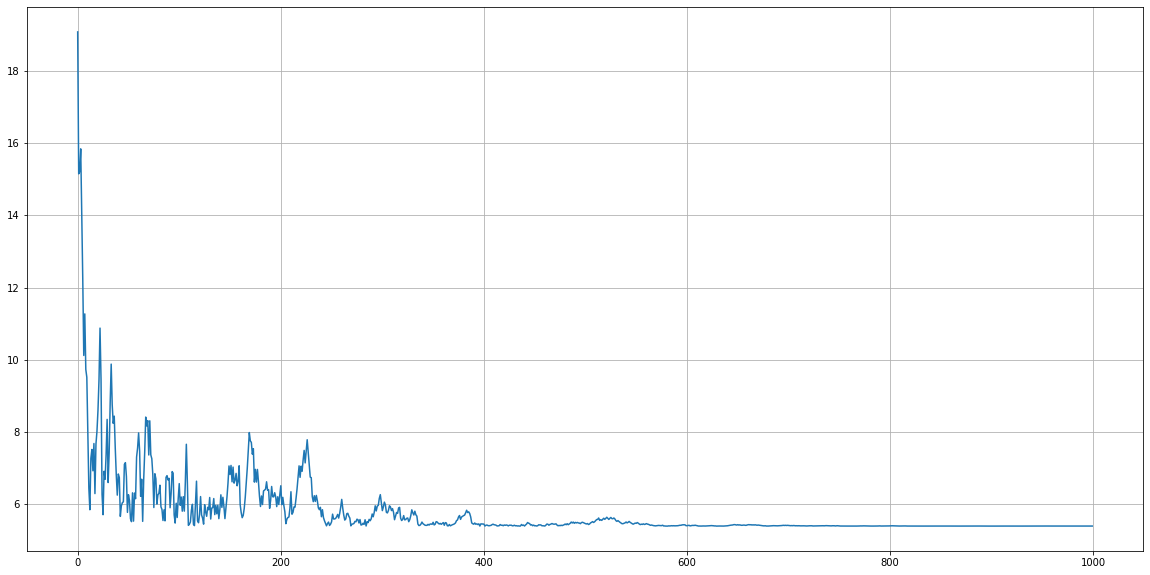

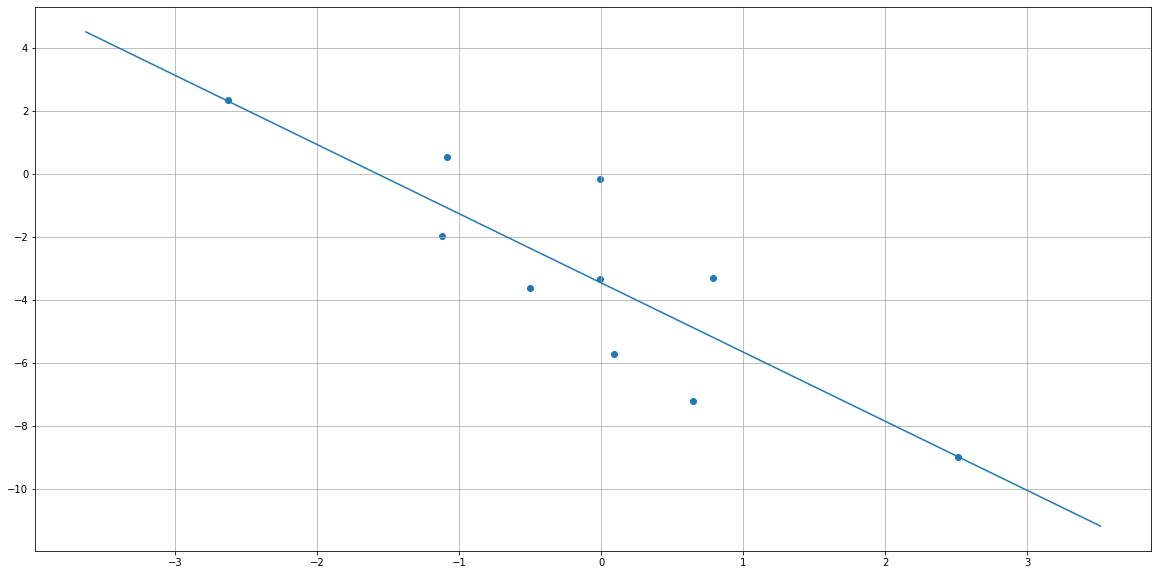

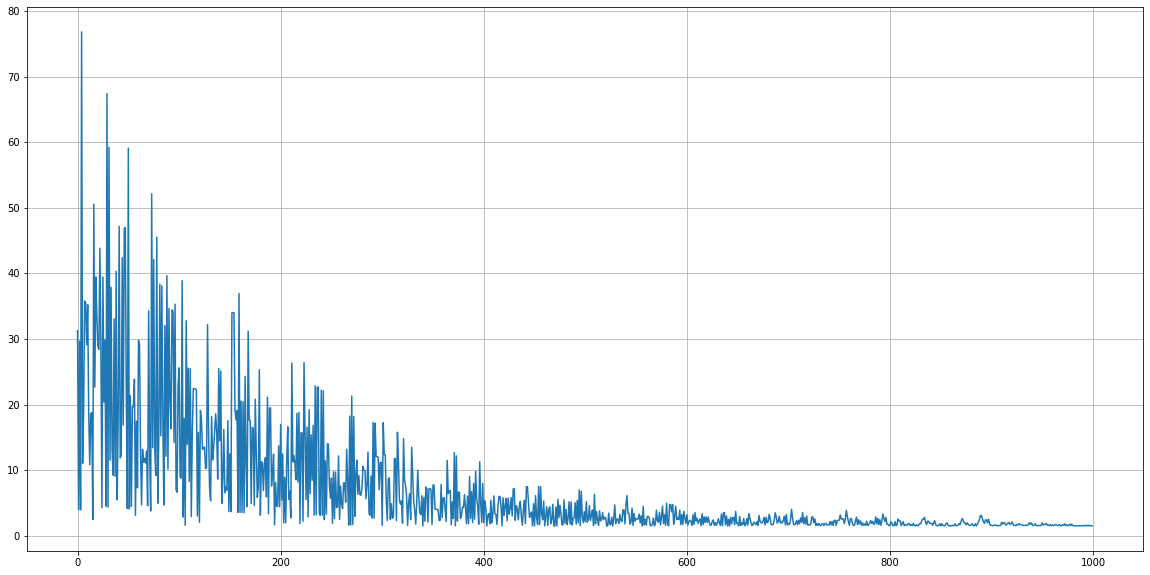

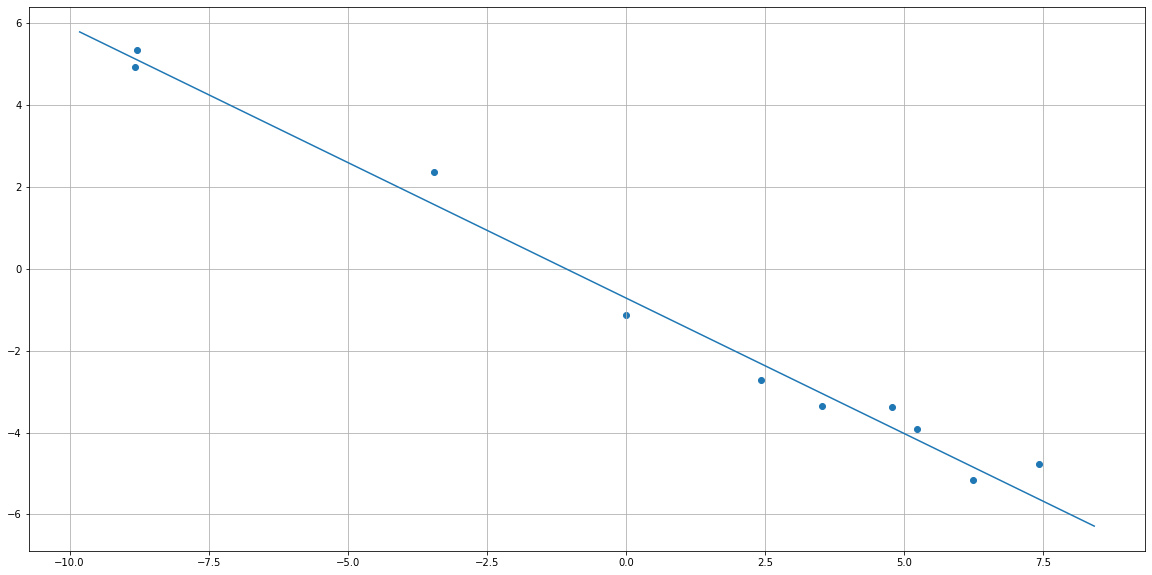

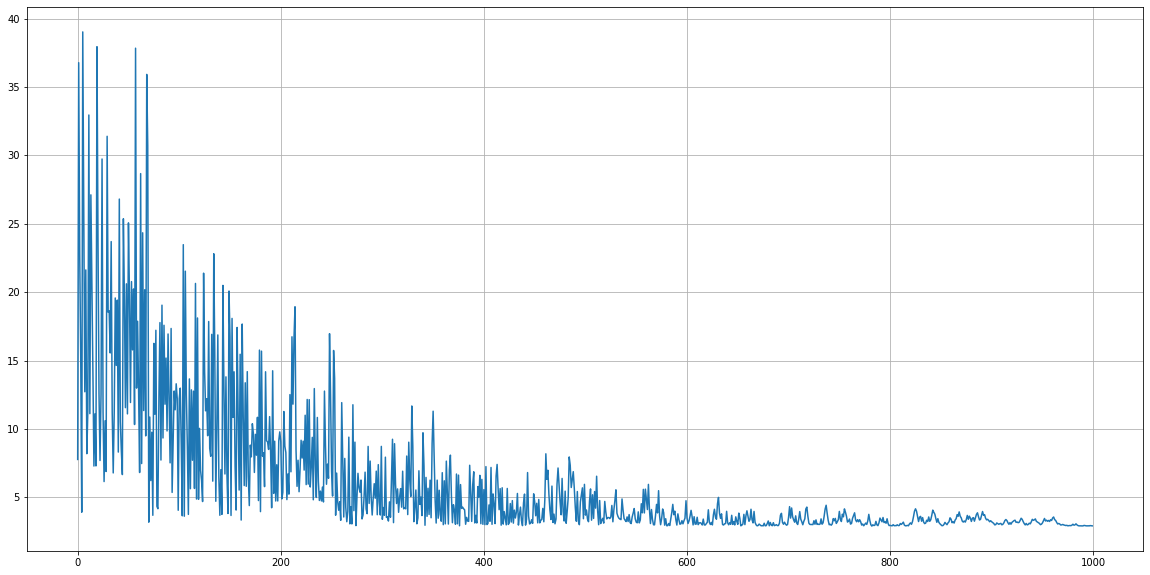

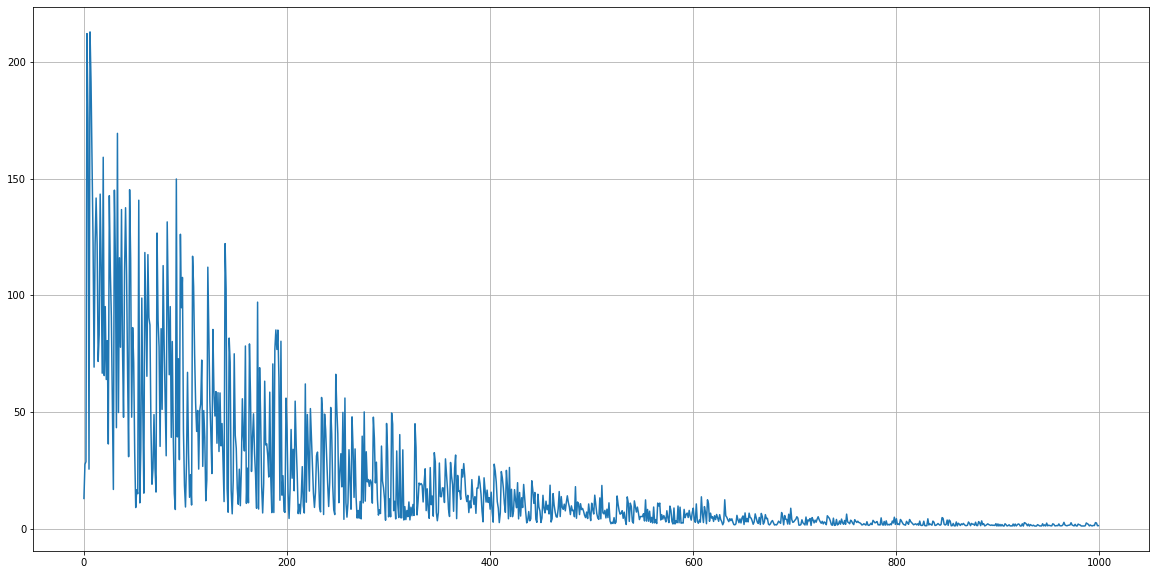

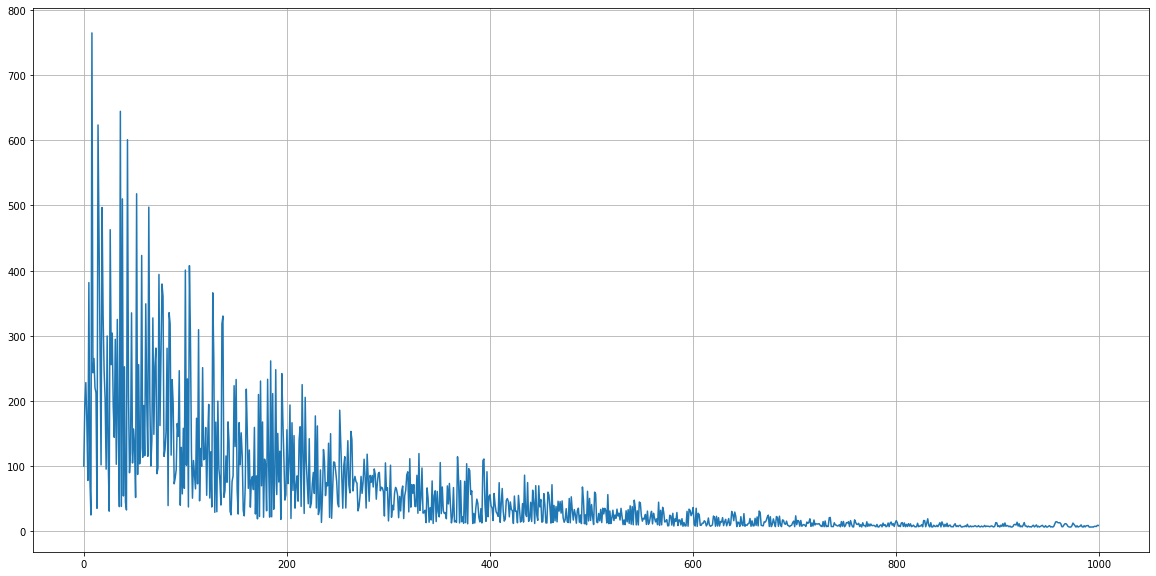

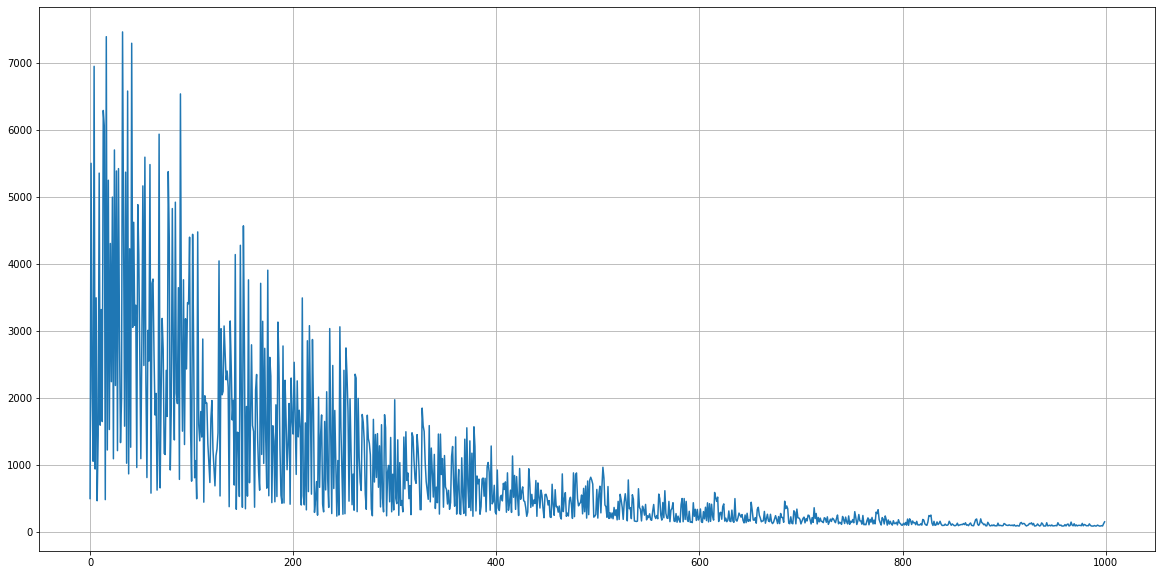

In [22]:
rand = lambda n: (np.random.rand(n)*2)-1

def random_perfect_line(n, k, limit, debug=False):
    m = rand(n)
    s = rand(n)
    ks = rand(k) * limit
    xy = np.array([m + s * k for k in ks])
    x = xy[:, :-1]
    y = xy[:, -1]
    if debug:
        print(f'{m=}\n{s=}\n{x=}\n{y=}')
    return x, y

def test_line(n, k, limit, eps):
    x, y = random_perfect_line(n, k, limit)
    x += np.array([rand(x.shape[1]) for _ in range(x.shape[0])])*eps
    y += rand(y.size)*eps
    return x, y

# line = random_perfect_line(2, 5, 10, True)

# sgd tests
regression(*test_line(2, 10, 10, 1))
regression(*test_line(2, 10, 10, 1))
regression(*test_line(2, 10, 10, 1))
regression(*test_line(3, 10, 10, 1))
regression(*test_line(10, 10, 10, 1))
regression(*test_line(10, 100, 10, 1))
regression(*test_line(10, 10000, 10, 1))

came close by 3.797742316136737
came close by 0.6889576018116262
came close by 0.7279851358293564
came close by 1.7931382433712018
came close by 0.29809686503785815
came close by 1.2147930619542047
came close by 0.49304335025352725
came close by 2.9096451064572237
came close by 1.5506773752895253
came close by 1.1904421620694199


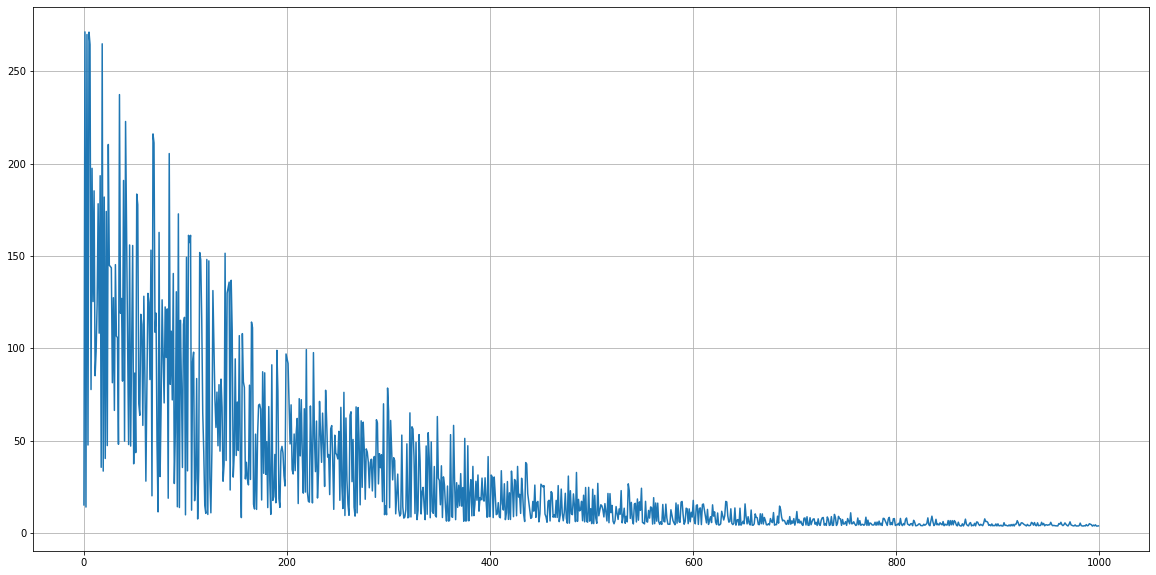

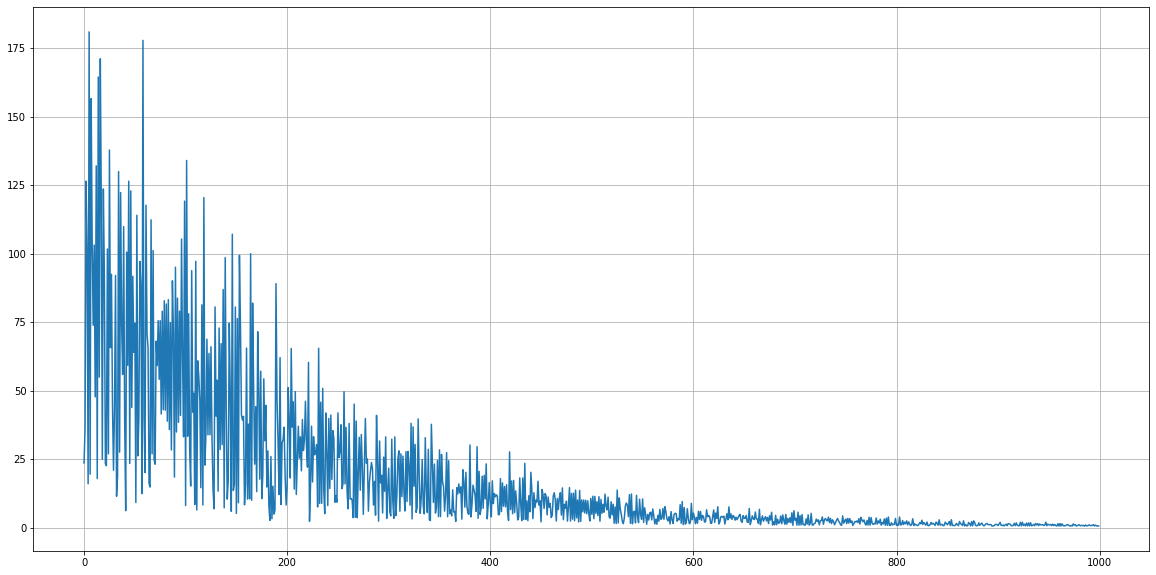

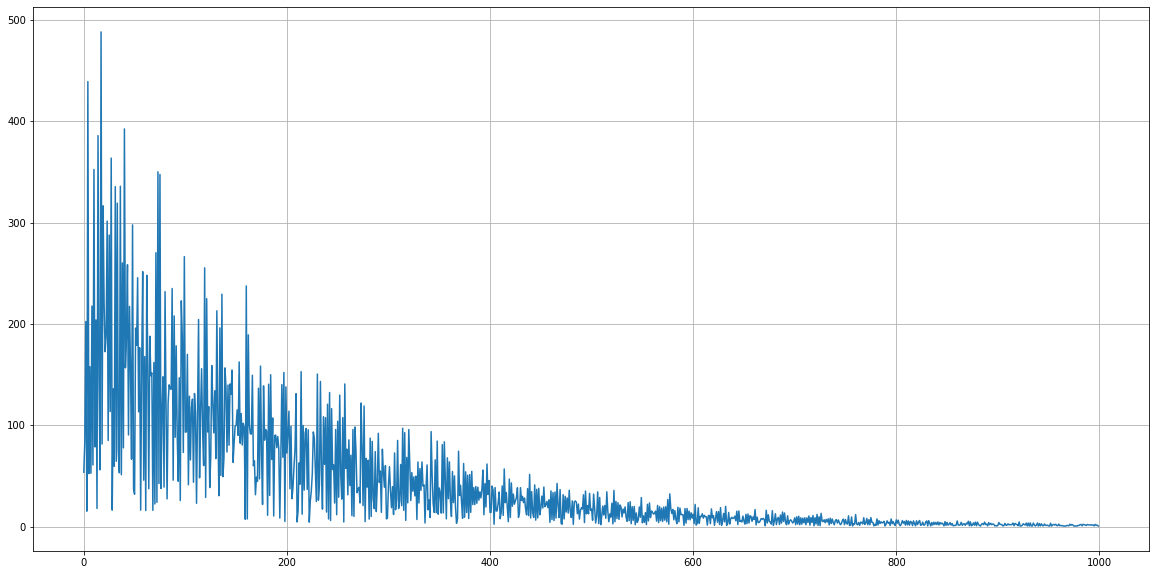

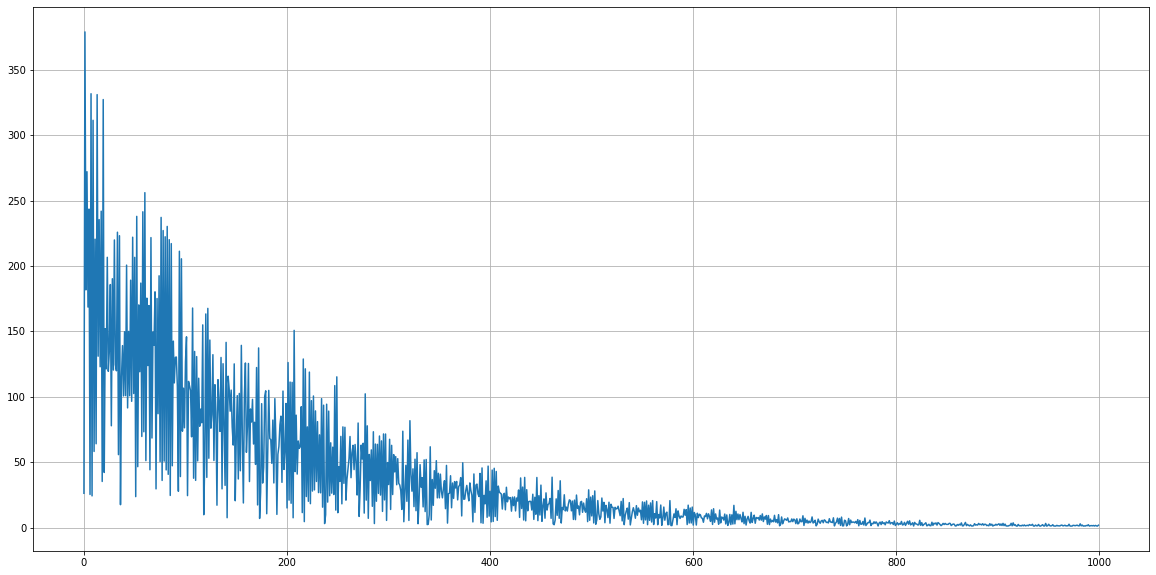

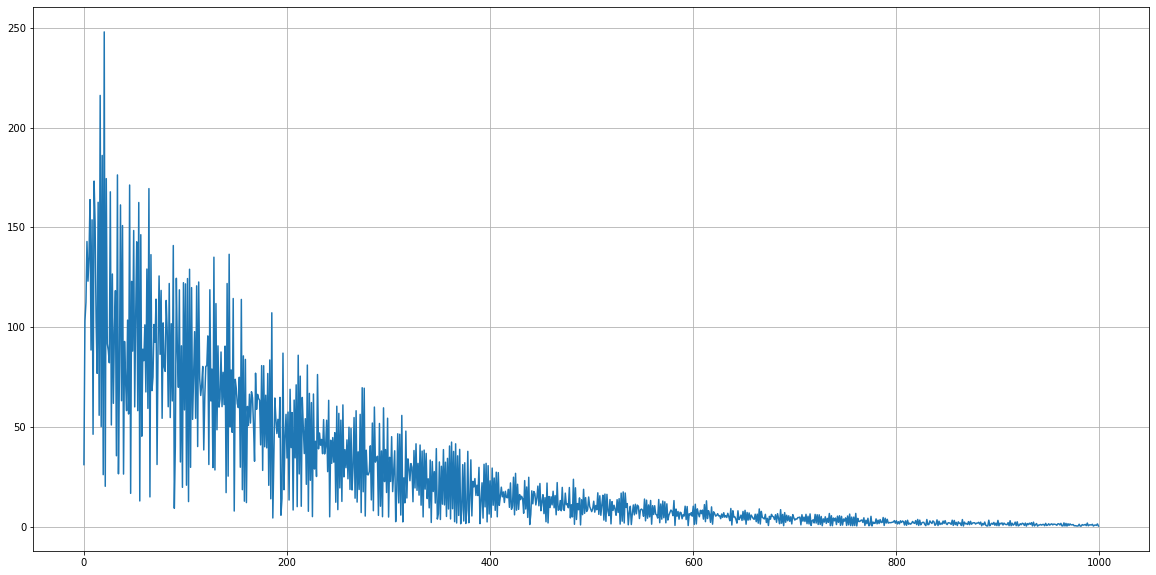

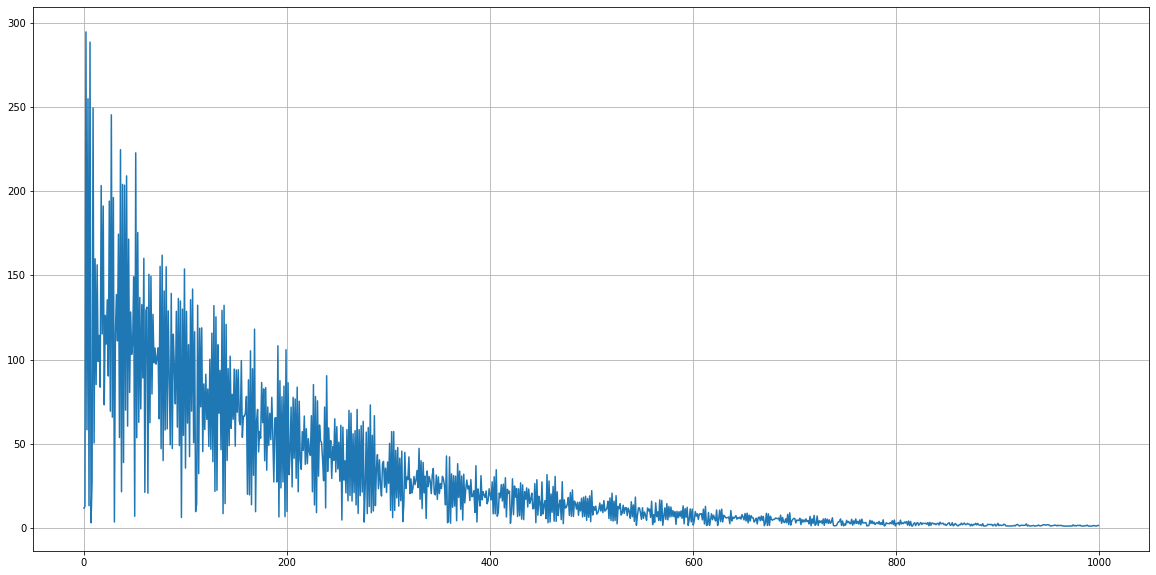

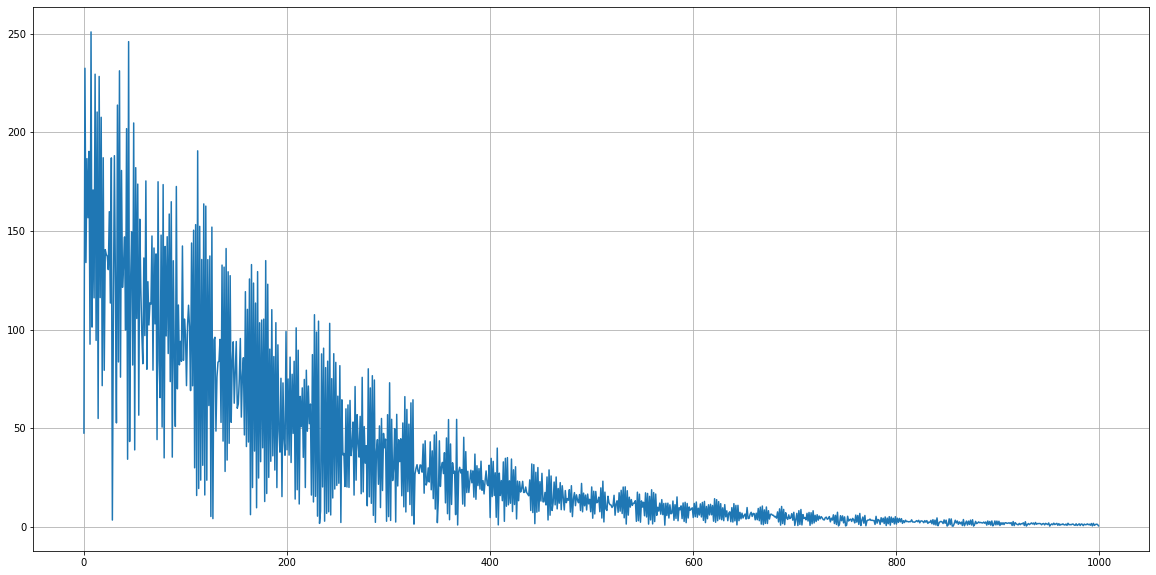

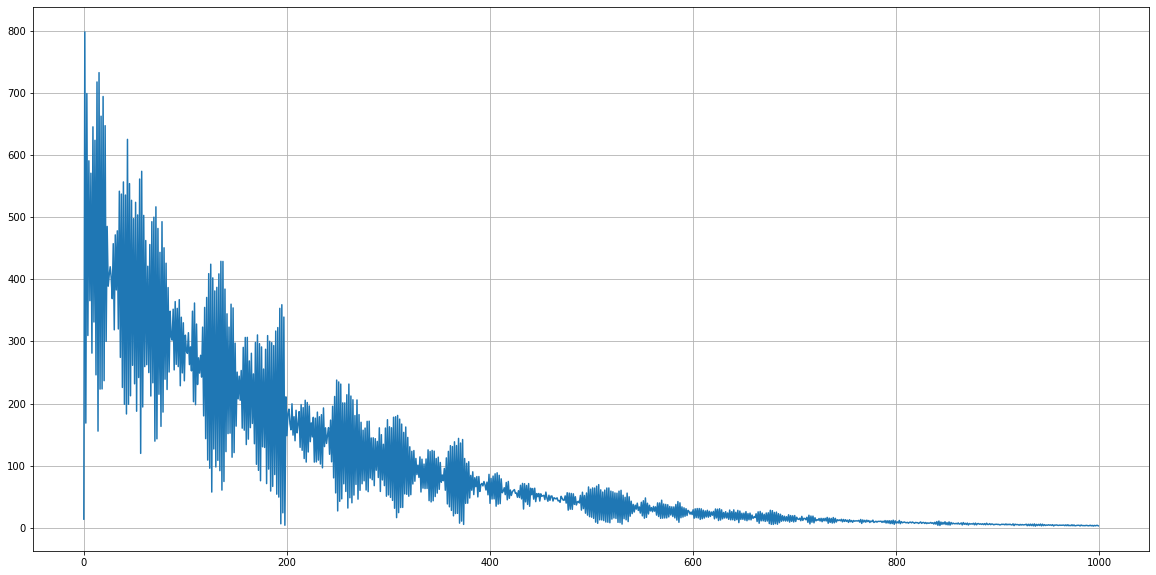

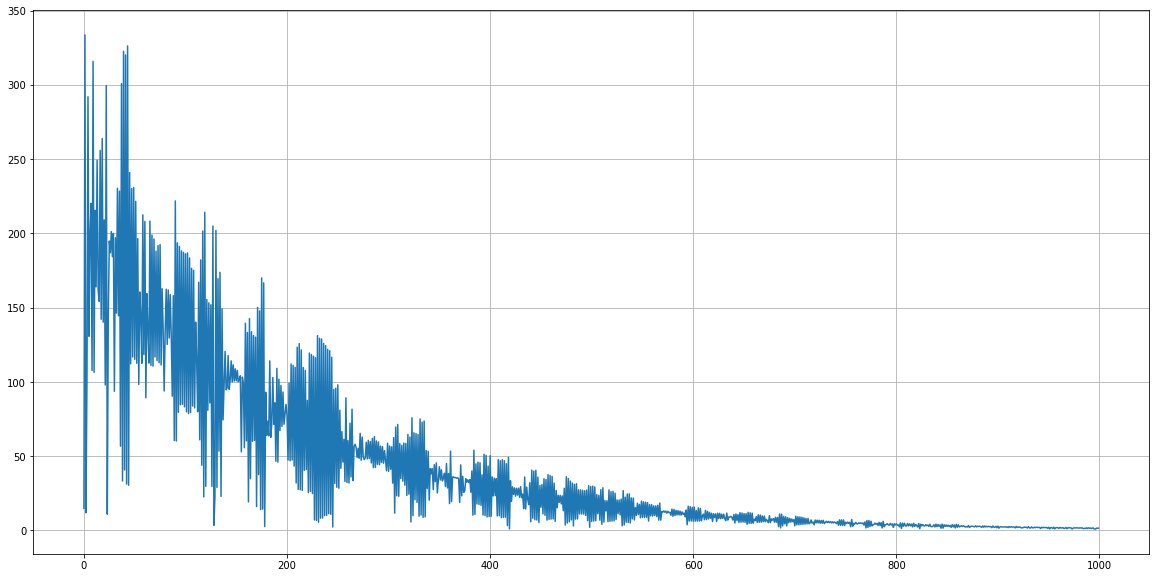

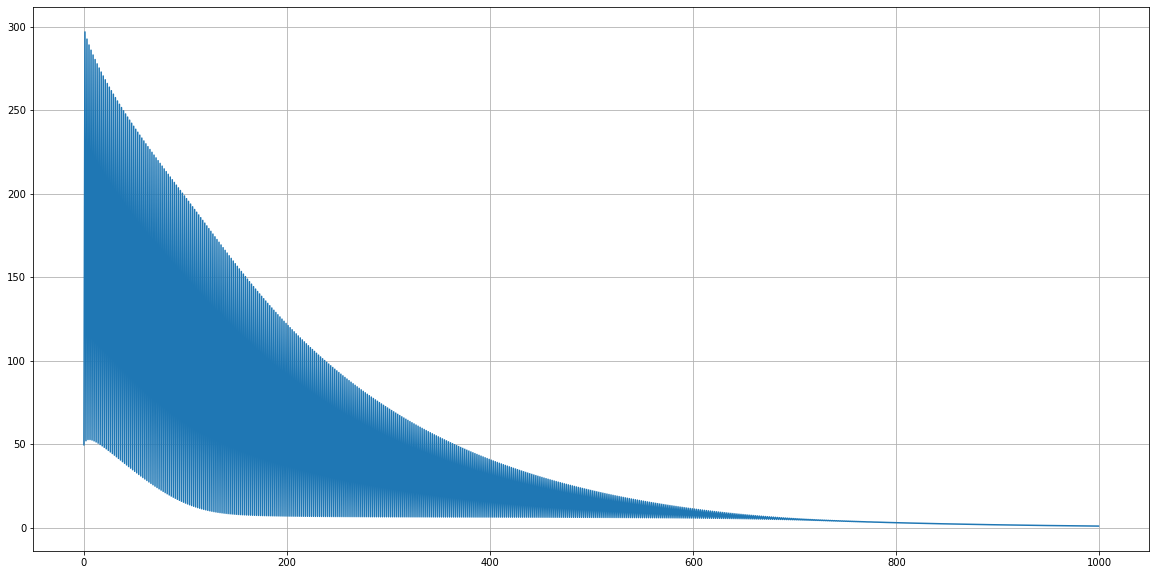

In [23]:
for i in range(1, 11):
    regression(*test_line(10, 10, 10, 1), i)

came close by 78.06259882144228
came close by 119.11570627117109
came close by 164.3424765308848
came close by 95.45748849342782
came close by 40.467468258049074
came close by 145.9182000827884
came close by 162.4129692837371
came close by 154.6261776559164
came close by 136.04049554711978


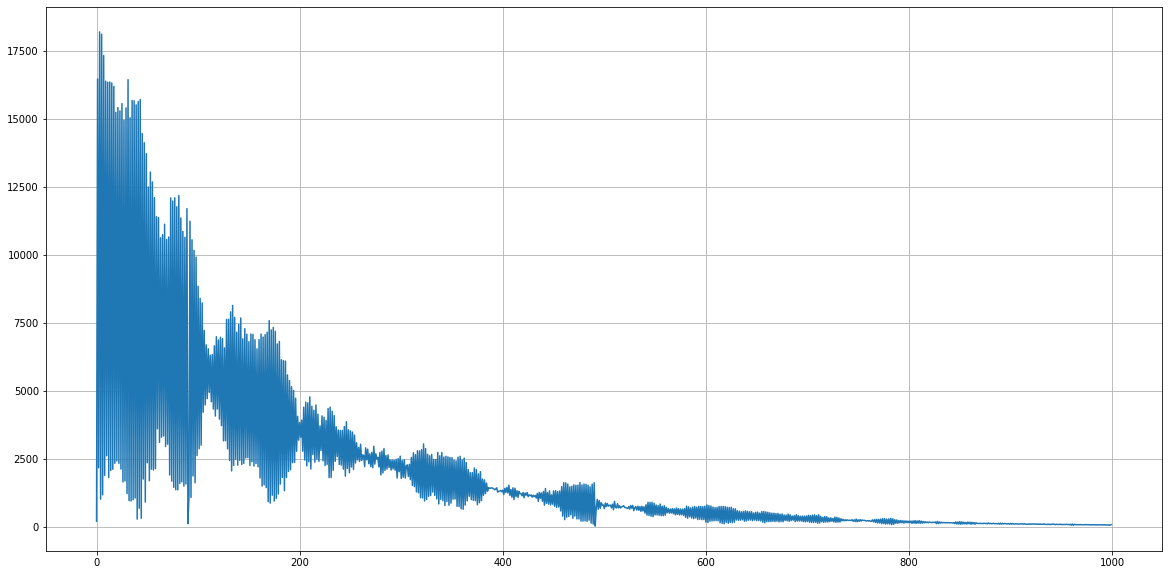

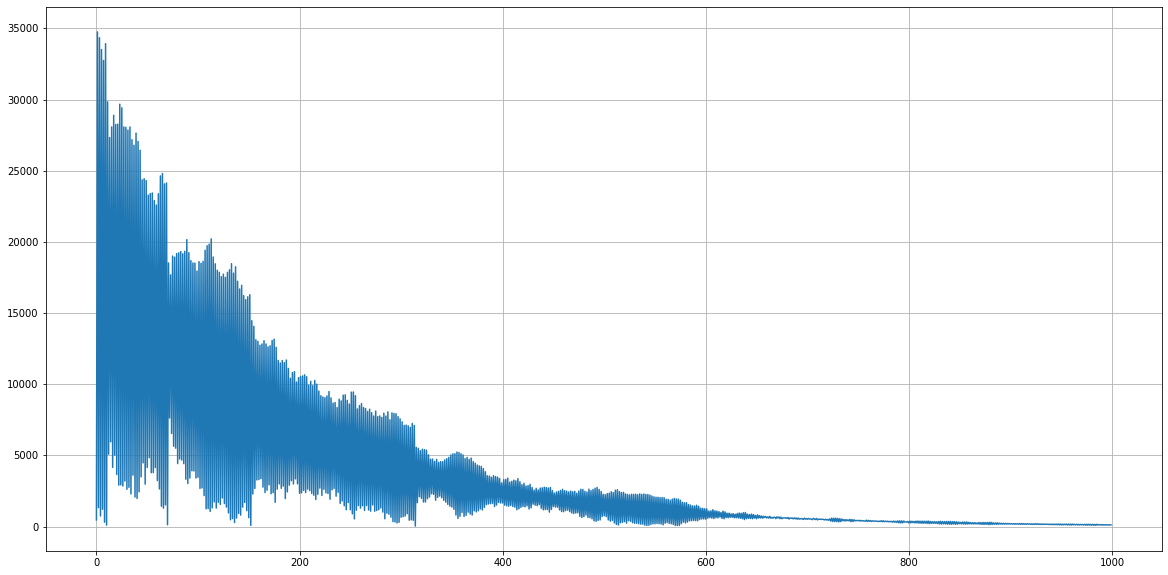

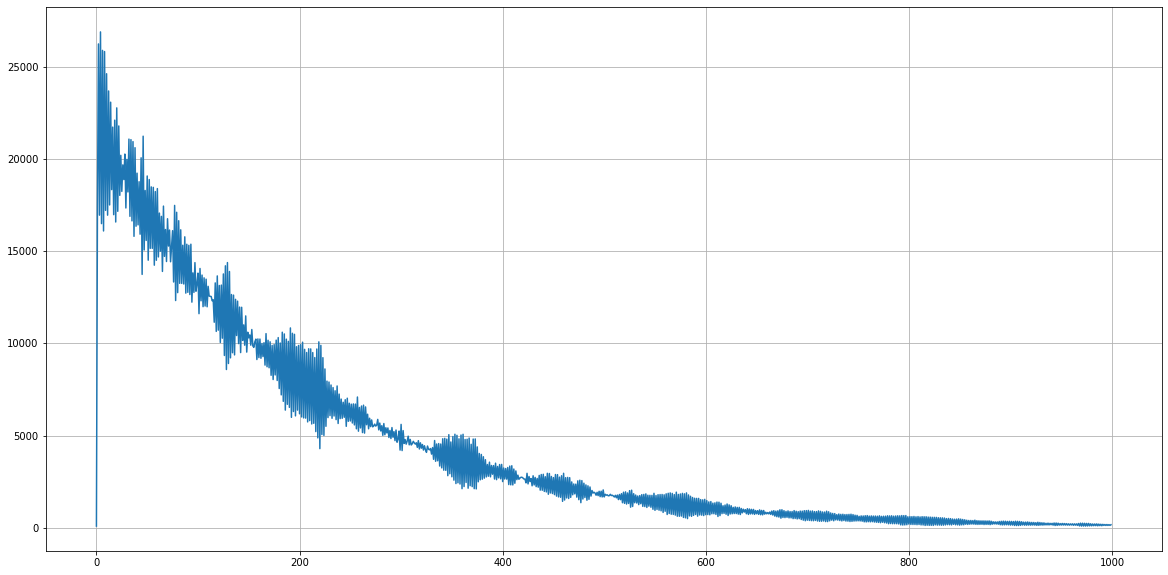

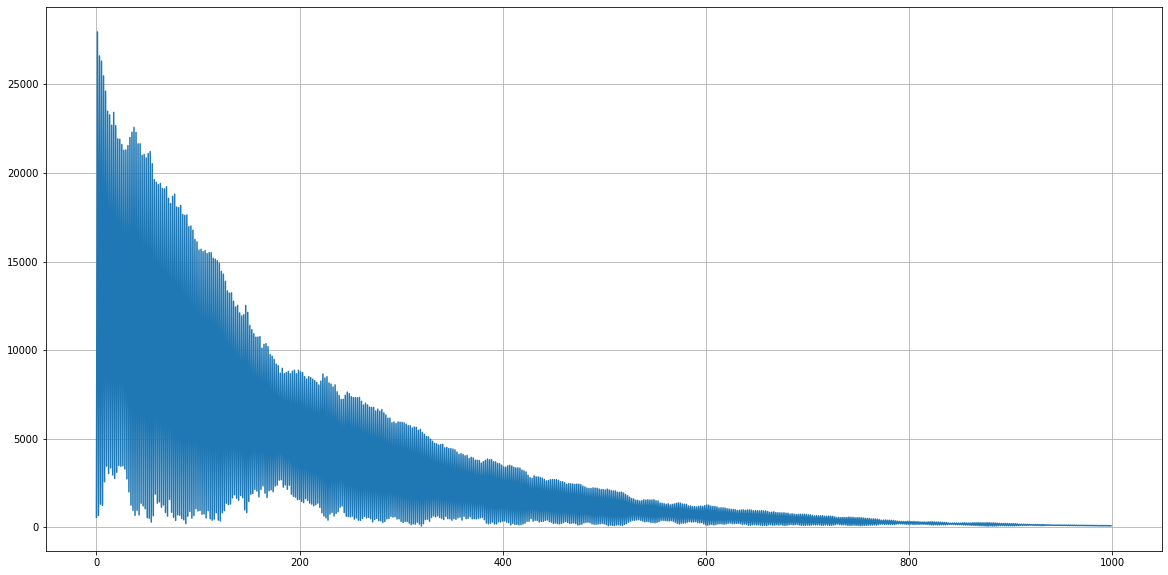

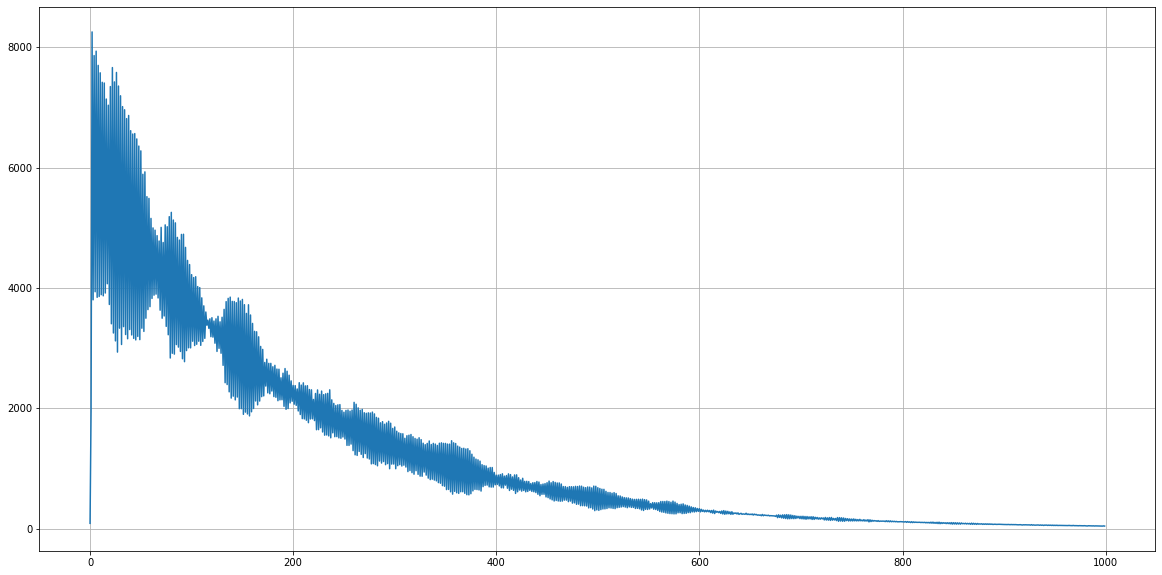

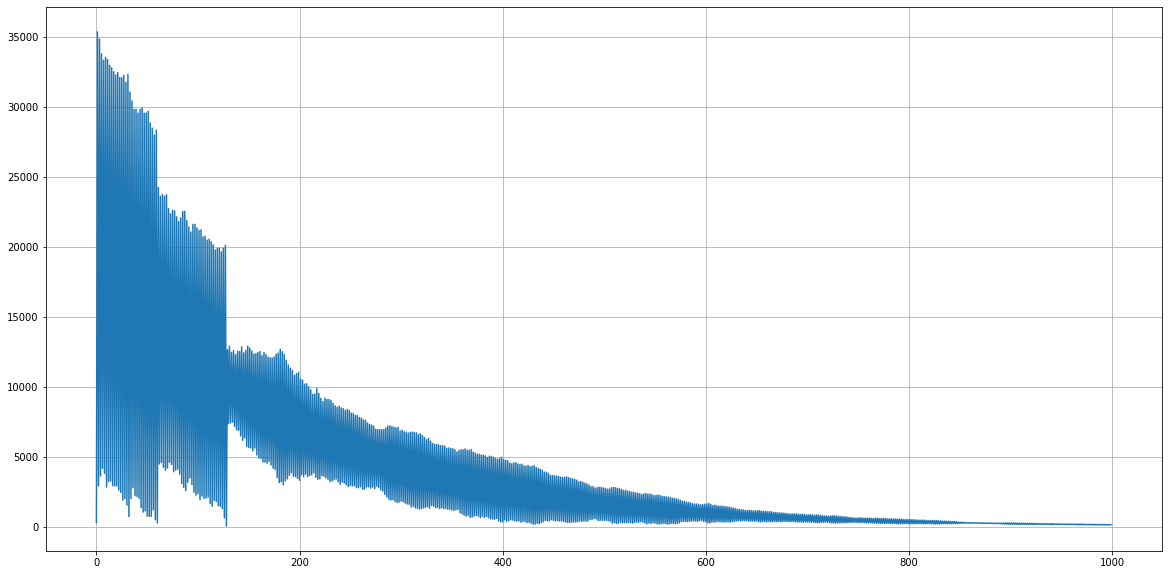

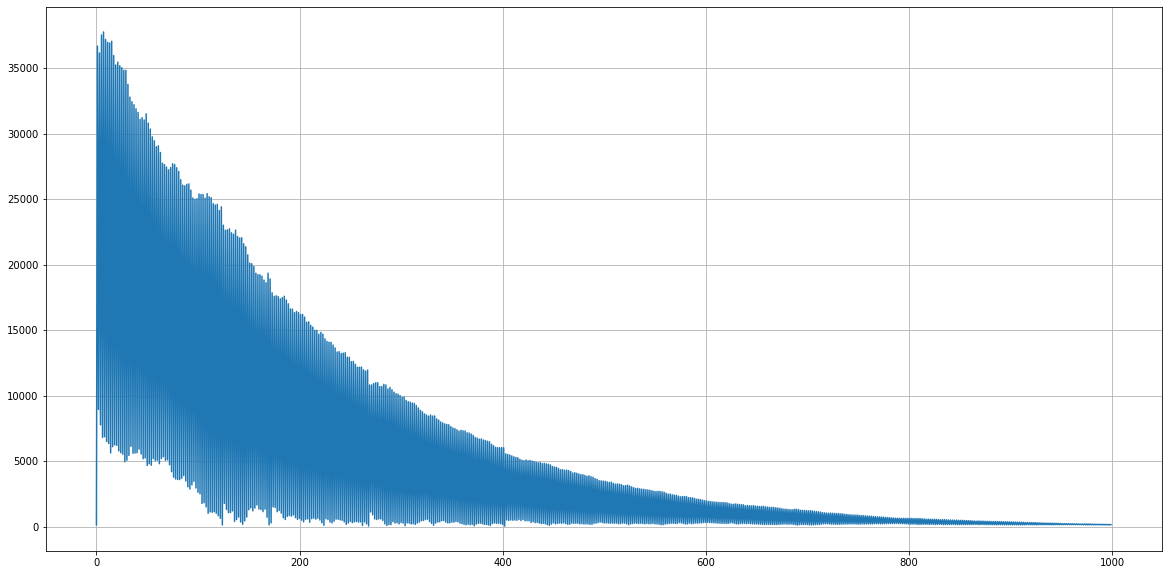

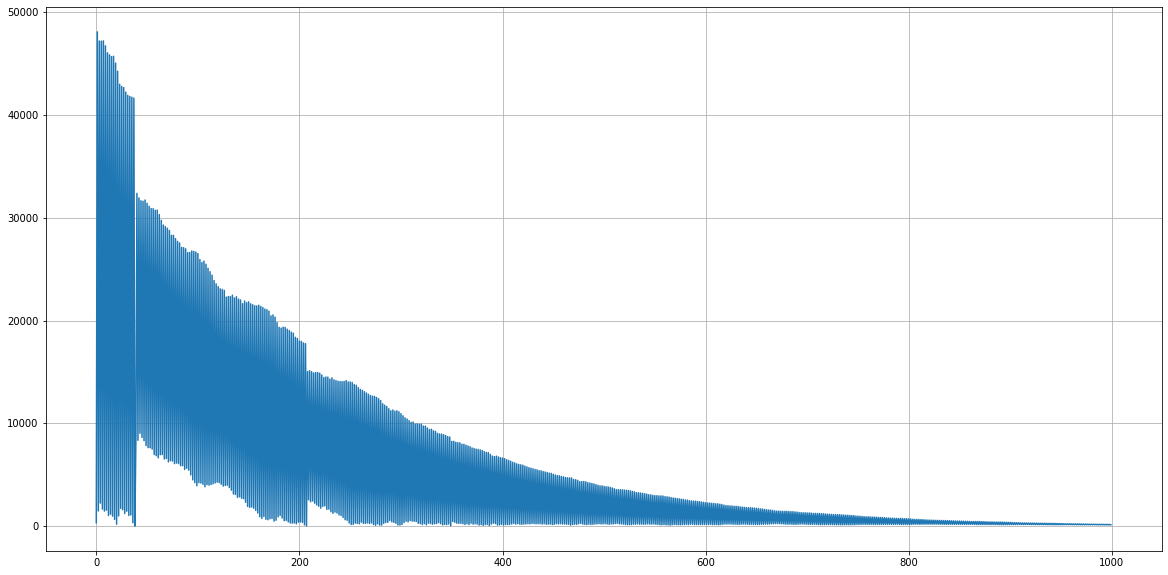

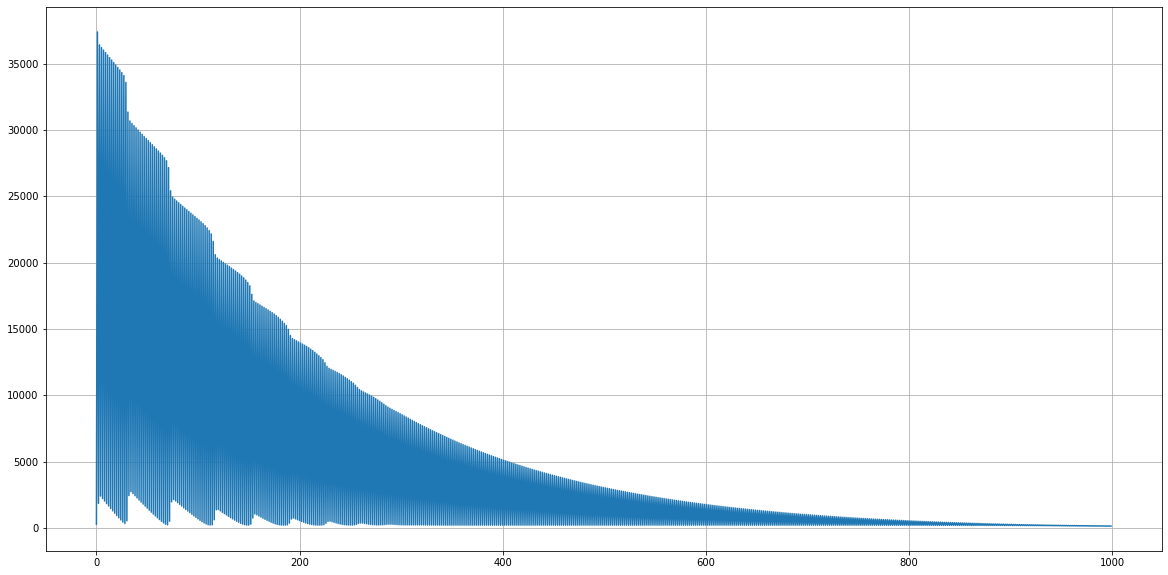

In [24]:
for i in range(2, 11):
    regression(*test_line(10, 1000, 10, 1), i*100)
